In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Bulge

Para el bulbo tomaremos a la velocidad circular de la siguiente forma $$\begin{equation}
V_{c}^{2} = 4\pi Gq_{b}\rho_{b,0}R^{2}\left(\frac{R}{a_{b}}\right)^{-\alpha_{b}}\int_{0}^{1}dx \frac{x^{2-\alpha_{b}}}{\sqrt{1-x^{2}e^{2}}}e^{-R^{2}x^{2}/r_{b}^{2}}
\end{equation}$$

$$\begin{equation}
\frac{v_{c}^{2}}{4\pi Gq_{b}\rho_{b,0}} = R^{2}\left(\frac{R}{a_{b}}\right)^{-\alpha_{b}}\int_{0}^{1}dx \frac{x^{2-\alpha_{b}}}{\sqrt{1-x^{2}e^{2}}}e^{-R^{2}x^{2}/r_{b}^{2}}
\end{equation}$$

donde de la tabla 2.3 sabemos que $\rho_{b,0}$ toma el valor 0.427 para el modelo I

In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
alpha_b = 1.8
rho_b_II = 0.3e9#sM/kpc^3

In [3]:
def I_b(x,R,q_b=0.6,alpha_b=1.8,r_b=1.9,a_b=a_b):
    e = np.sqrt(1. - q_b**2.)
    n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
    d = np.sqrt(1.-x**2.*e**2.)
    t = R**2.*(R/a_b)**(-alpha_b)
    return (t*n)/d

In [4]:
R = np.linspace(0.,15.,100)

In [5]:
def Vc_ad_b(l):
    Integral_b = []
    for i in range (0,len(l)):
        result = integrate.quad(I_b,0,1,args=(l[i]))[0]
        Integral_b.append(result)
    return np.array(Integral_b)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


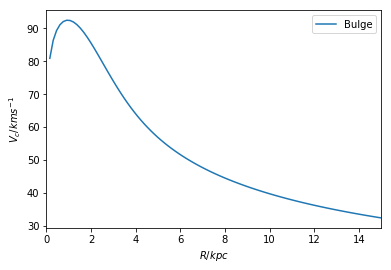

In [6]:
V_b = np.sqrt(4.*np.pi*G*q_b*rho_b_II*Vc_ad_b(R))
plt.plot(R,V_b,label='Bulge')
xlim(0.,15.)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# DM Halo

Para calcular la velocidad circular de halo de materia oscura volvemos a utiliar la expresión (2.132) del libro Galactic Dynamics, Binney & Tremaine
$$\begin{equation}
v_{c}^{2} (R) = 4\pi G\sqrt{1-e^{2}} \int_{0}^{R} dm \frac{m^{2} \rho (m^{2})}{\sqrt{R^{2} - m^{2}e^{2}}}
\end{equation}$$

$$\begin{equation}
v_{c}^{2} = 4\pi Gq_{h}R^{2}\left(\frac{R}{a_{h}}\right)^{-\alpha_{h}}\int_{0}^{1}dx\frac{x^{2-\alpha_{h}}}{\sqrt{1-x^{2}e^{2}}}\left(1+\frac{Rx}{a_{h}}\right)^{\alpha_{h} - \beta_{h}}
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}}{4\pi Gq_{h}} = R^{2}\left(\frac{R}{a_{h}}\right)^{-\alpha_{h}}\int_{0}^{1}dx\frac{x^{2-\alpha_{h}}}{\sqrt{1-x^{2}e^{2}}}\left(1+\frac{Rx}{a_{h}}\right)^{\alpha_{h} - \beta_{h}}
\end{equation}$$

In [7]:
q_h = 0.8
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3

In [8]:
def I_h(x,R,q_h=0.8,alpha_h=1.63,a_h=a_h_II,beta_h=2.17):
    e = np.sqrt(1.- q_h**2.)
    n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
    d = np.sqrt(1-x**2.*e**2)
    t = R**2.*(R/a_h)**(-alpha_h)
    result = (t*n)/d
    return result

In [9]:
def Vc_h(l):
    Integral_DM = []
    for i in range (0,len(l)):
        result = integrate.quad(I_h,0,1,args=(l[i]))[0]
        Integral_DM.append(result)
    return np.array(Integral_DM)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


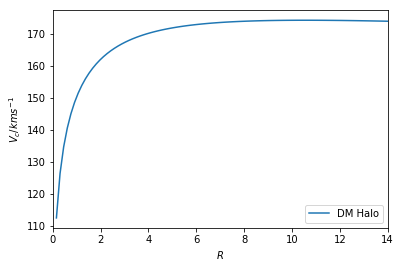

In [10]:
Vc_DM = np.sqrt(4.*np.pi*G*q_h*rho_h_II*Vc_h(R))
plt.plot(R,Vc_DM,label='DM Halo')
xlim(0.,14.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.show()

# Stelar Disk

Para calcular la velocidad circular del disco estelar seguimos una metodología distinta, explicada detalladamente en el pdf de la tesis
$$\begin{equation}
\frac{v^{2}_{c}}{2\pi G\Sigma_{d}R_{d}} =  R_{d} - e^{-R/R_{d}}(R_{d} + R) 
\end{equation}$$

$$\begin{equation}
v^{2}_{c} = 2\pi\Sigma_{d}R_{d}G\left( -e^{-R/R_{d}} - \frac{R_{d}e^{R/R_{d}}}{R}  + \frac{R_{d}}{R}\right)
\end{equation}$$

In [11]:
def V2_c_SD(R,R_d=3.2):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
    return result

In [12]:
#Constants
R_d_II = 3.2#kpc
Sigma_d_SD = (536.0e6)*0.75#SM/kpc^2

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


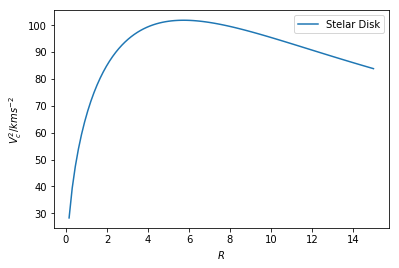

In [13]:
Vc_SD = np.sqrt(2.*np.pi*G*Sigma_d_SD*R_d_II*V2_c_SD(R))
plt.plot(R,Vc_SD,label='Stelar Disk')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V^{2}_{c}/km s^{-2}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

# Interstelar medium

Para el medio interestelar seguimos el mismo procedimiento que en el caso anterior
$$\begin{equation}
V^{2}_{c} = \frac{GM(R)}{R} = \frac{2\pi G\Sigma_{g}R^{2}\int_{0}^{1}ue^{-Ru/R_{g}-R_{m}/Ru} du}{R} = 2\pi G\Sigma_{g}R\int_{0}^{1}ue^{-Ru/R_{g}-R_{m}/Ru} du
\end{equation}$$

In [15]:
def M_g_ISM(u,R,R_d=3.2,R_m=4.):
    return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))

In [16]:
#Constants
R_m = 4.#kpc
Sigma_g_ISM = (536.0e6)*0.25#SM/kpc^2

In [17]:
def V_c_g_ISM(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_ISM,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    return Integral

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


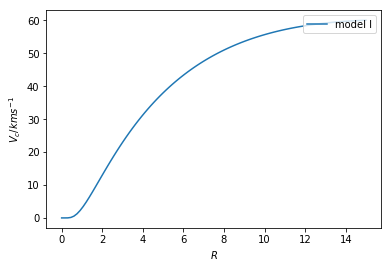

In [18]:
Vc_ISM = np.sqrt(2.*np.pi*Sigma_g_ISM*G*V_c_g_ISM(R))
plt.plot(R,Vc_ISM,label='model I')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [21]:
def Vc2_tot(l):
    V2_b = 4.*np.pi*G*q_b*rho_b_II*Vc_ad_b(l)
    V2_DM = 4.*np.pi*G*q_h*rho_h_II*Vc_h(l)
    V2_SD = 2.*np.pi*G*Sigma_d_SD*R_d_II*V2_c_SD(l)
    V2_ISM = 2.*np.pi*Sigma_g_ISM*G*V_c_g_ISM(l)
    suma = V2_b + V2_DM + V2_SD + V2_ISM
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


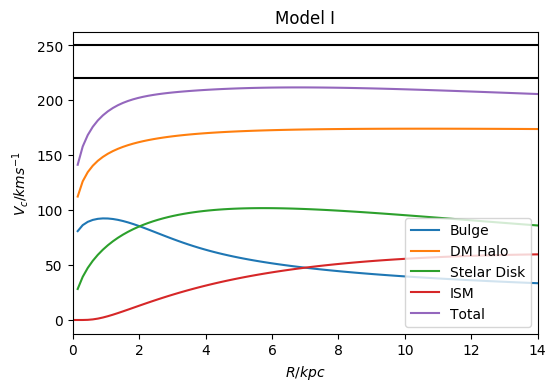

In [23]:
fig=plt.figure(dpi=100)
plt.plot(R,V_b,label='Bulge')
plt.plot(R,Vc_DM,label='DM Halo')
plt.plot(R,Vc_SD,label='Stelar Disk')
plt.plot(R,Vc_ISM,label='ISM')
plt.plot(R,Vc2_tot(R),label='Total')
xlim(0.,14.)
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.title('Model I')
plt.hlines(220,0,15)
plt.hlines(250,0,15)
plt.show()

In [24]:
import galkin
import galkin.plots
# import auxiliary modules
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters

In [25]:
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=220.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [36]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=0				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=0					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=1				# whether to use planetary nebulae
flagDurand98=1					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=0					# whether to use classical cepheids
flagPont94=0					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [37]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [38]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  220.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 1
  use Durand+ 98?                         1
 use cepheids?                          0
 use C stars?                           0
 use masers?                            0
 use astropy?                           0


In [39]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing planetary nebulae...
 processing Durand+ 98...
  selected  79  out of the total sample of  867  planetary nebulae


/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0,0.5,'$v_c$ [km/s]')

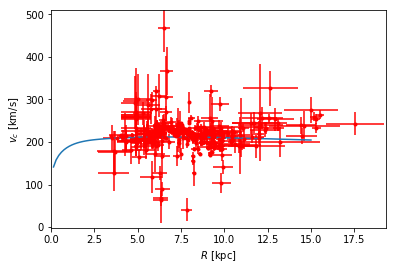

In [40]:
vecRp    =[row[0] for row in totallistvc]    # galactocentric distance [kpc]
vecerrRp =[row[1] for row in totallistvc]    # error in galactocentric distance [kpc]
vecvRp   =[row[2] for row in totallistvc]    # rotation velocity [km/s]
vecerrvRp=[row[3] for row in totallistvc]    # error in rotation velocity [km/s]
fig, ax1 = plt.subplots()
fig.canvas.set_window_title('rotation curve measurements')
fig.patch.set_facecolor('white') # setting background to white
ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='r.')
ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
plt.plot(R,Vc2_tot(R))#,label='Total')
ax1.set_xlabel('$R$ [kpc]')
ax1.set_ylabel('$v_c$ [km/s]')